In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

In [ ]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
dataset = dataset.iloc[:,2:]
dataset.head(2)

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0


In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)
pd.DataFrame(x_sc).head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=52, stratify=y)

In [ ]:
print(x_train.shape, x_test.shape)

(320, 2) (80, 2)


# Case 1 : Batch Gradient Descent

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=320)
# batch_size=320 - Batch Gradient Descent (total training datapoint is 320 and batch size = 320, 320/320 = 1)
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 1s 770ms/step - loss: 0.6775 - accuracy: 0.6344 - val_loss: 0.6321 - val_accuracy: 0.7625
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 0.6206 - accuracy: 0.7781 - val_loss: 0.5945 - val_accuracy: 0.7750
Epoch 3/10
1/1 [==============================] - 0s 30ms/step - loss: 0.5842 - accuracy: 0.8031 - val_loss: 0.5644 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5556 - accuracy: 0.8250 - val_loss: 0.5395 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5319 - accuracy: 0.8375 - val_loss: 0.5179 - val_accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5116 - accuracy: 0.8375 - val_loss: 0.4988 - val_accuracy: 0.8125
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 0.4939 - accuracy: 0.8375 - val_loss: 0.4818 - val_accuracy: 0.8125
Epoch 8/10
1/1 [==========

# BGD : Time : 1.735093355178833
### loss: 0.4620 - accuracy: 0.8500 - val_loss: 0.4392 - val_accuracy: 0.8750

# SGD :

In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history2 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1)
# batch_size=1 - Stochastic Gradient Descent (total training datapoint is 320 and batch size = 1, 320/1 =320)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 2s 5ms/step - loss: 0.3722 - accuracy: 0.8281 - val_loss: 0.2763 - val_accuracy: 0.8625
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3086 - accuracy: 0.8750 - val_loss: 0.2110 - val_accuracy: 0.9250
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.8875 - val_loss: 0.1873 - val_accuracy: 0.9375
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.8938 - val_loss: 0.1806 - val_accuracy: 0.9375
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.9031 - val_loss: 0.1659 - val_accuracy: 0.9500
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.8969 - val_loss: 0.1633 - val_accuracy: 0.9375
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2964 - accuracy: 0.9000 - val_loss: 0.1648 - val_accuracy: 0.9375
Epoch 

# BGD : Time : 1.735093355178833
### loss: 0.4620 - accuracy: 0.8500 - val_loss: 0.4392 - val_accuracy: 0.8750

# SGD : Time : 12.322636842727661
### loss: 0.2935 - accuracy: 0.8938 - val_loss: 0.1481 - val_accuracy: 0.9625

# Rule 1 : Time : BGD > SGD
# Rule 2 : Accuracy : SGD > BGD

# Mini-Batch Gradient Descent (MBGD)

In [ ]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=2))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=10)
# batch_size=32 - Mini Batch Gradient Descent (total training datapoint is 320 and batch size = 32, 320/32 =10)
print(time.time()-start)

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 0.4823 - accuracy: 0.7969 - val_loss: 0.3549 - val_accuracy: 0.8750
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8531 - val_loss: 0.2739 - val_accuracy: 0.9250
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2975 - accuracy: 0.8813 - val_loss: 0.2331 - val_accuracy: 0.9250
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2814 - accuracy: 0.8969 - val_loss: 0.2111 - val_accuracy: 0.9250
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.9000 - val_loss: 0.1967 - val_accuracy: 0.9375
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.8969 - val_loss: 0.1866 - val_accuracy: 0.9500
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.8969 - val_loss: 0.1798 - val_accuracy: 0.9500
Epoch 8/10
32/32 [==

# BGD : Time : 1.735093355178833
### loss: 0.4620 - accuracy: 0.8500 - val_loss: 0.4392 - val_accuracy: 0.8750

# SGD : Time : 12.322636842727661
### loss: 0.2935 - accuracy: 0.8938 - val_loss: 0.1481 - val_accuracy: 0.9625

# Rule 1 : Time : BGD > SGD
# Rule 2 : Accuracy : SGD > BGD

# Mini-Batch Gradient Descent (MBGD)
# Time : 2.0878615379333496
# loss: 0.2509 - accuracy: 0.8938 - val_loss: 0.1804 - val_accuracy: 0.9375

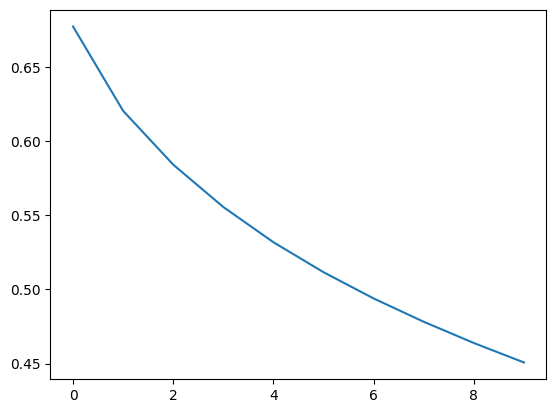

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])

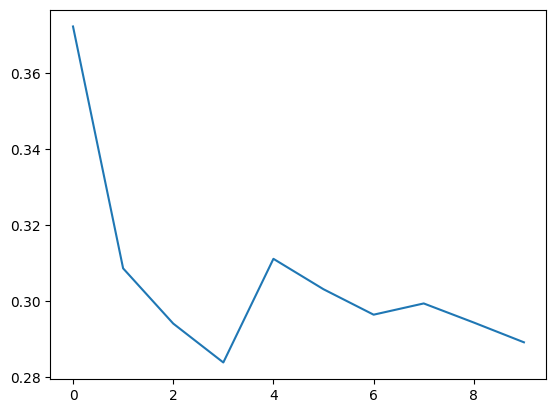

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])


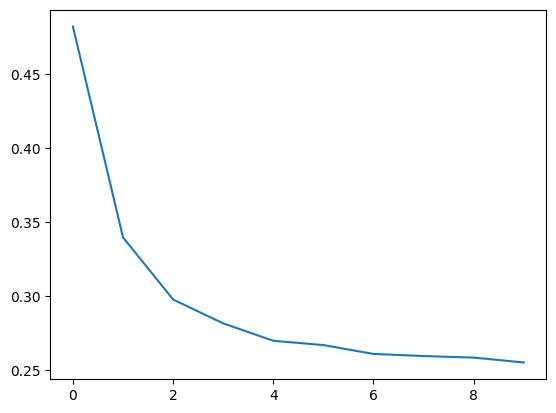

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'])

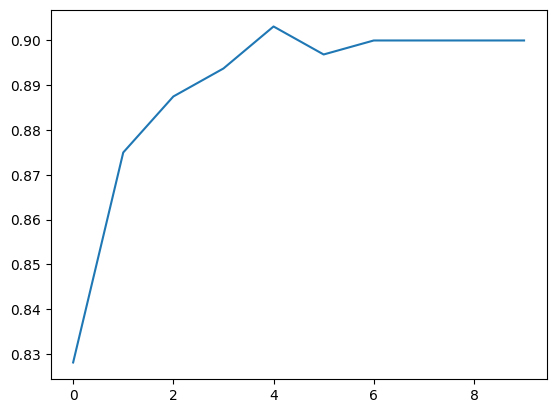

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
delhi = pd.read_csv('/content/DailyDelhiClimateTest.csv')
delhi.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
delhi = delhi[['date', 'meantemp']]

In [ ]:
delhi.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


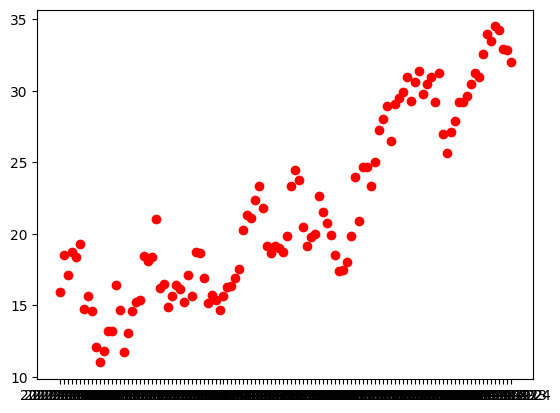

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(delhi['date'], delhi['meantemp'], color='red')
plt.show()

In [ ]:
# Exponential Weighted Moving Avg values :

x1 = delhi['meantemp'].ewm(alpha=0.9).mean() # 10 days avg
x2 = delhi['meantemp'].ewm(alpha=0.1).mean() # 1 day avg
x3 = delhi['meantemp'].ewm(alpha=0.5).mean() # 2 days avg
# alpha=beta=0.9=10days avg value
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [ ]:
delhi['ewm'] = x1
delhi

,date,meantemp,ewm
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


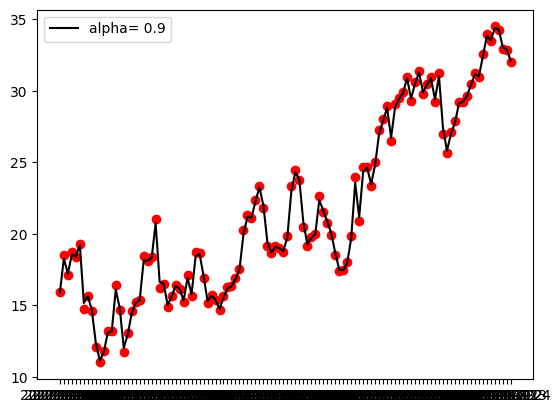

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(delhi['date'], delhi['meantemp'], color='red')
plt.plot(delhi['date'], delhi['ewm'], color='black', label='alpha= 0.9')
plt.legend()
plt.show()

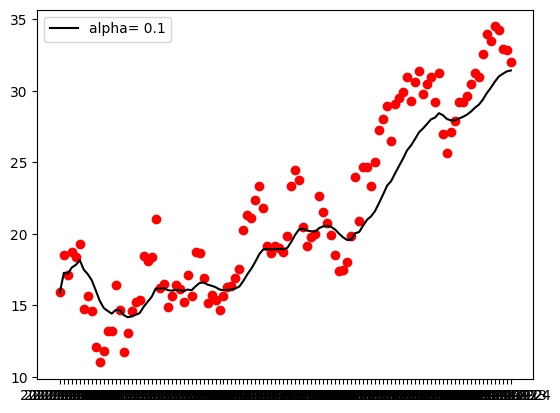

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(delhi['date'], delhi['meantemp'], color='red')
plt.plot(delhi['date'], x2, color='black', label='alpha= 0.1')
plt.legend()
plt.show()

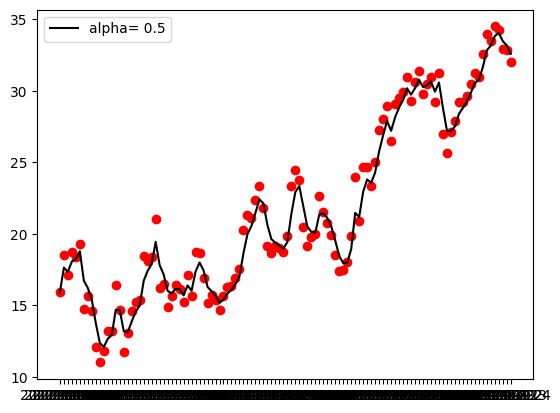

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(delhi['date'], delhi['meantemp'], color='red')
plt.plot(delhi['date'], x3, color='black', label='alpha= 0.5')
plt.legend()
plt.show()

# SGD
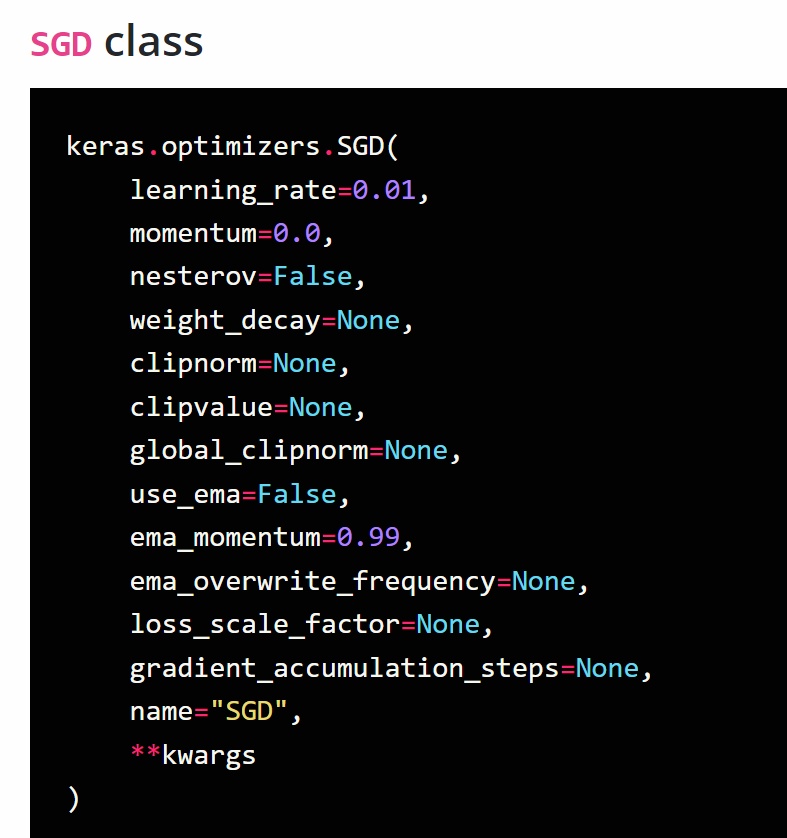

# Momentum
# Momentum  - 0.9 and Nestrerov = False
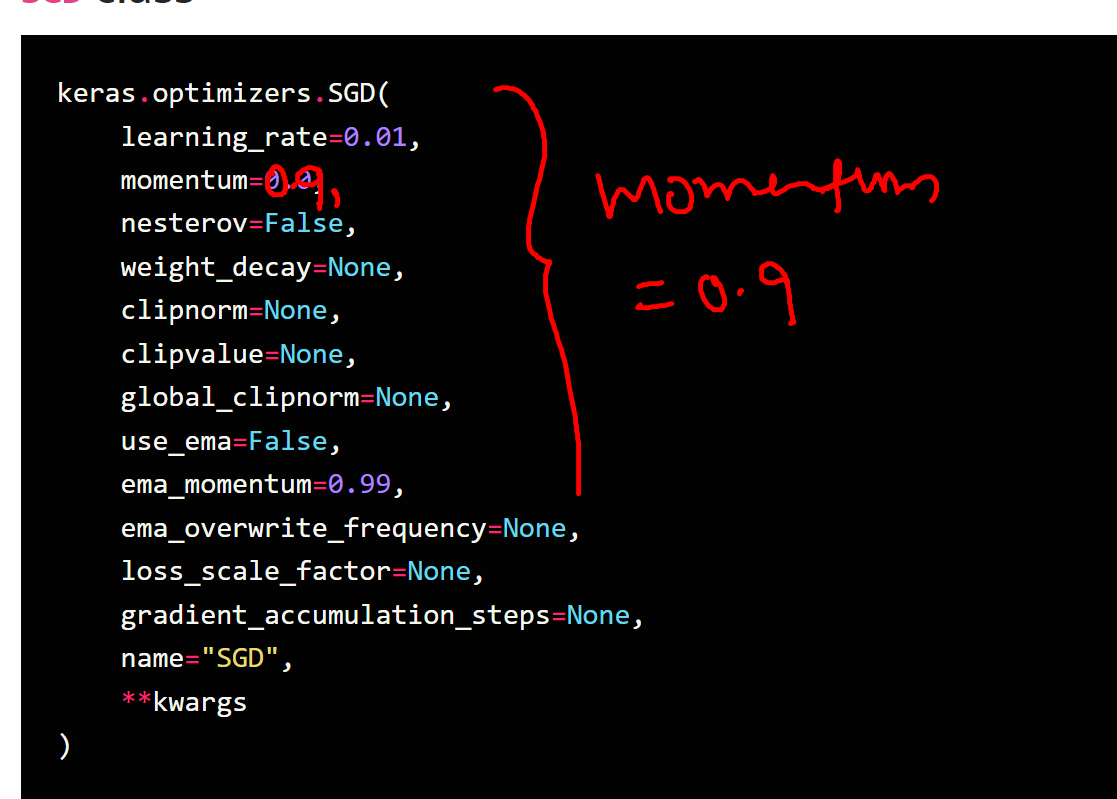

# NAG : momentum = 0.9 and Nesterov = True

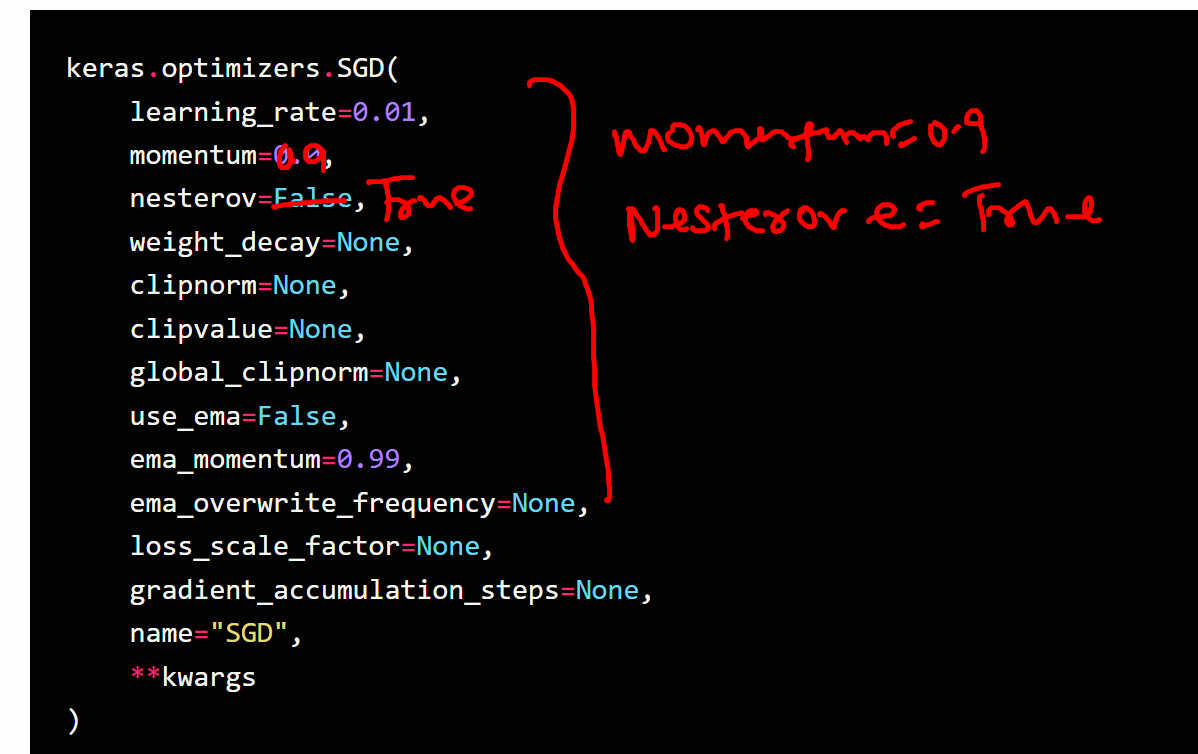